In [167]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import natural_cubic_spline_stack_overflow as ncs
from math import *

# 1st scenario: UK government plan

This scenario is a inflow-driven scenario. UK government plan to build 300 000 new buildings by 2030 and probably the same amount each year until 2050. As this plan is fot the UK, we need to reduce the number for England.

In [168]:
DSM_AB_model = pd.read_csv('Model/DSM_model_AB.csv')
DSM_AB_model=DSM_AB_model.set_index('Unnamed: 0')
DSM_MFH_model = pd.read_csv('Model/DSM_model_MFH.csv')
DSM_MFH_model=DSM_MFH_model.set_index('Unnamed: 0')
DSM_SFH_model = pd.read_csv('Model/DSM_model_SFH.csv')
DSM_SFH_model=DSM_SFH_model.set_index('Unnamed: 0')
DSM_TH_model = pd.read_csv('Model/DSM_model_TH.csv')
DSM_TH_model=DSM_TH_model.set_index('Unnamed: 0')

DSM_model=DSM_AB_model.copy(deep=True)
DSM_model['Stock']=DSM_AB_model['Stock']+DSM_MFH_model['Stock']+DSM_SFH_model['Stock']+DSM_TH_model['Stock']
DSM_model['Stock Change']=DSM_AB_model['Stock Change']+DSM_MFH_model['Stock Change']+DSM_SFH_model['Stock Change']+DSM_TH_model['Stock Change']

display(DSM_model)

,Population,Stock,PpD,Stock Change,Inflow,Outflow
Unnamed: 0,,,,,,
1600,0,NaN,0,NaN,0.000000,NaN
1601,0,9.164954e+02,0,916.495390,0.000000,0.000000
1602,0,1.848435e+03,0,931.939497,0.000000,0.000000
1603,0,2.798496e+03,0,950.060643,0.000000,0.000000
1604,0,3.766606e+03,0,968.110948,0.000000,0.000000
...,...,...,...,...,...,...
2046,0,2.678180e+07,0,111427.673721,10674.089303,2226.245097
2047,0,2.689416e+07,0,112357.561844,10832.940856,2257.591054
2048,0,2.700745e+07,0,113286.332422,10993.201521,2289.371527


In [38]:
display(DSM_model_s2)

,Population,Stock,PpD,Stock Change,Inflow,Outflow
Unnamed: 0,,,,,,
1600,0,NaN,0,NaN,0.000000,NaN
1601,0,9.164954e+02,0,916.495390,0.000000,0.000000
1602,0,1.848435e+03,0,931.939497,0.000000,0.000000
1603,0,2.798496e+03,0,950.060643,0.000000,0.000000
1604,0,3.766606e+03,0,968.110948,0.000000,0.000000
...,...,...,...,...,...,...
2046,0,2.678180e+07,0,282000.000000,10674.089303,2226.245097
2047,0,2.689416e+07,0,282000.000000,10832.940856,2257.591054
2048,0,2.700745e+07,0,282000.000000,10993.201521,2289.371527


In [42]:
print(DSM_model_s2.index[-51:])

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
            2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
            2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
            2044, 2045, 2046, 2047, 2048, 2049, 2050],
           dtype='int64', name='Unnamed: 0')


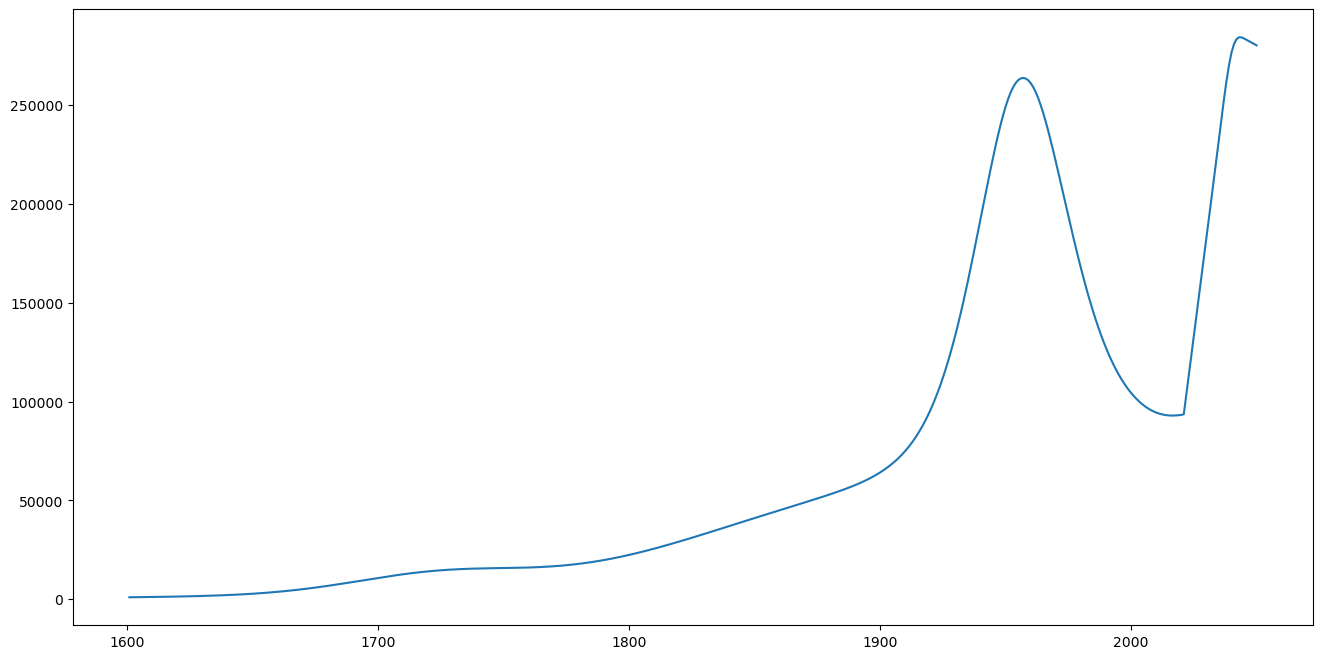

In [169]:
plt.figure(figsize=(16,8))

DSM_model_s2=DSM_model.copy(deep=True)
target_UK=300000
ratioUK_En=0.94
target_En=target_UK * ratioUK_En
for i in range (2022,2041):
    DSM_model_s2.loc[i,'Stock Change']=DSM_model_s2.loc[i-1,'Stock Change']+(target_En - DSM_model_s2.loc[2021,'Stock Change']) / (2040-2021)
for i in range (2041,2051):
    DSM_model_s2.loc[i,'Stock Change']=target_En

inputs=np.array(DSM_model_s2.index[-30:])
outputs=DSM_model_s2.loc[2021:2051,'Stock Change']

no_knots = int(len(inputs)/6)
ncs_model = ncs.get_natural_cubic_spline_model(inputs, outputs, minval=min(inputs), maxval=max(inputs), n_knots = no_knots)
O_model = ncs_model.predict(inputs)
fit_label = f'natural cubic splines with {no_knots} knots'  

DSM_model_s2.loc[2021:2051,'Stock Change']=O_model
    
plt.plot(DSM_model_s2['Stock Change'])


In [170]:
share_AB=DSM_AB_model.loc[2021,'Stock Change']/DSM_model.loc[2021,'Stock Change']
share_MFH=DSM_MFH_model.loc[2021,'Stock Change']/DSM_model.loc[2021,'Stock Change']
share_SFH=DSM_SFH_model.loc[2021,'Stock Change']/DSM_model.loc[2021,'Stock Change']
share_TH=DSM_TH_model.loc[2021,'Stock Change']/DSM_model.loc[2021,'Stock Change']

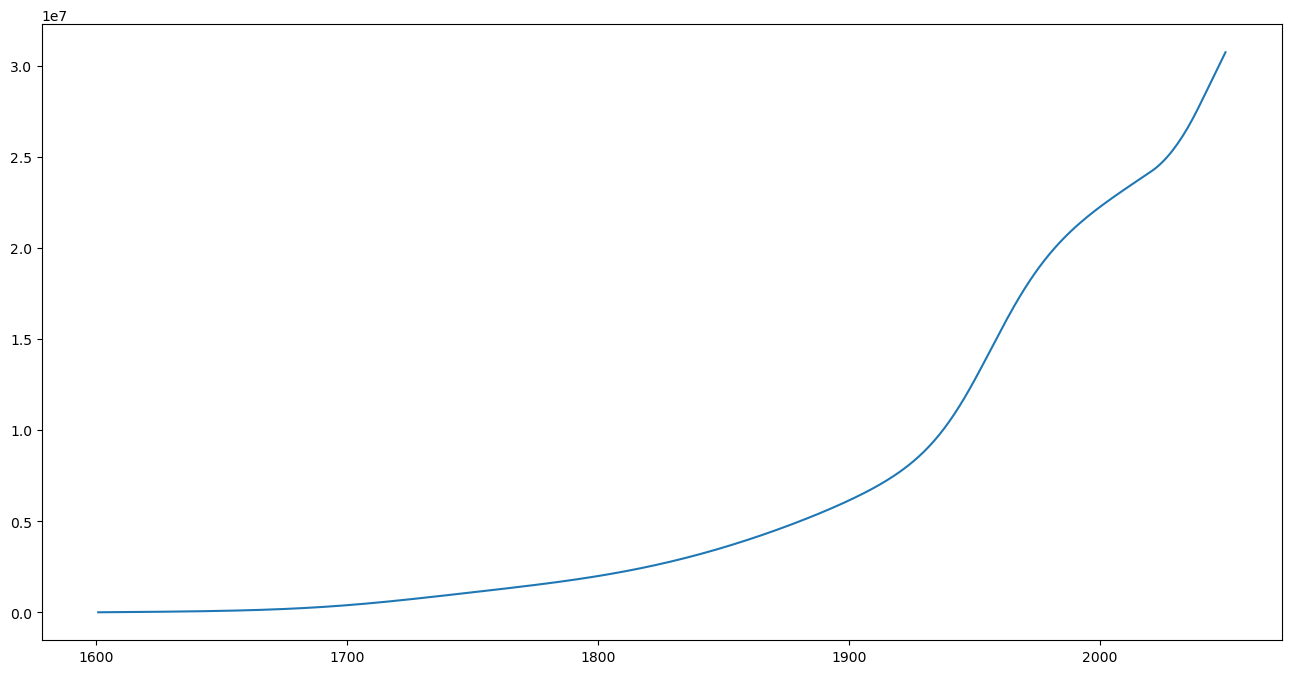

In [171]:
plt.figure(figsize=(16,8))

for i in range (2021,2051):
    DSM_model_s2.loc[i,'Stock'] = DSM_model_s2.loc[i-1,'Stock'] + DSM_model_s2.loc[i,'Stock Change']


plt.plot(DSM_model_s2['Stock'])

In [172]:
DSM_AB_s2 = DSM_AB_model.copy(deep=True)
DSM_MFH_s2 = DSM_MFH_model.copy(deep=True)
DSM_SFH_s2 = DSM_SFH_model.copy(deep=True)
DSM_TH_s2 = DSM_TH_model.copy(deep=True)

In [173]:
DSM_AB_s2.loc[2021:2051,'Stock Change'] = share_AB * DSM_model_s2.loc[2021:2051,'Stock Change']
DSM_MFH_s2.loc[2021:2051,'Stock Change'] = share_MFH * DSM_model_s2.loc[2021:2051,'Stock Change']
DSM_SFH_s2.loc[2021:2051,'Stock Change'] = share_SFH * DSM_model_s2.loc[2021:2051,'Stock Change']
DSM_TH_s2.loc[2021:2051,'Stock Change'] = share_TH * DSM_model_s2.loc[2021:2051,'Stock Change']

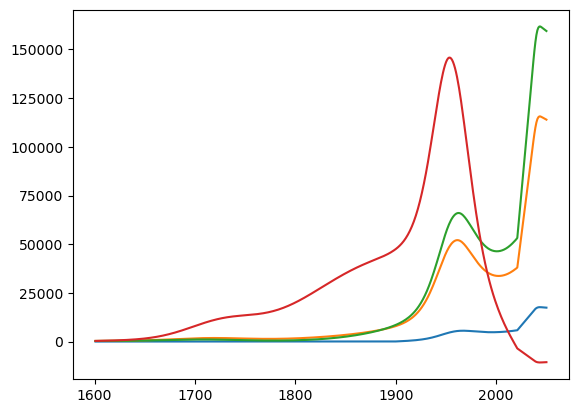

In [174]:
plt.plot(DSM_AB_s2['Stock Change'])
plt.plot(DSM_MFH_s2['Stock Change'])
plt.plot(DSM_SFH_s2['Stock Change'])
plt.plot(DSM_TH_s2['Stock Change'])
plt.show()

<Figure size 1600x800 with 0 Axes>

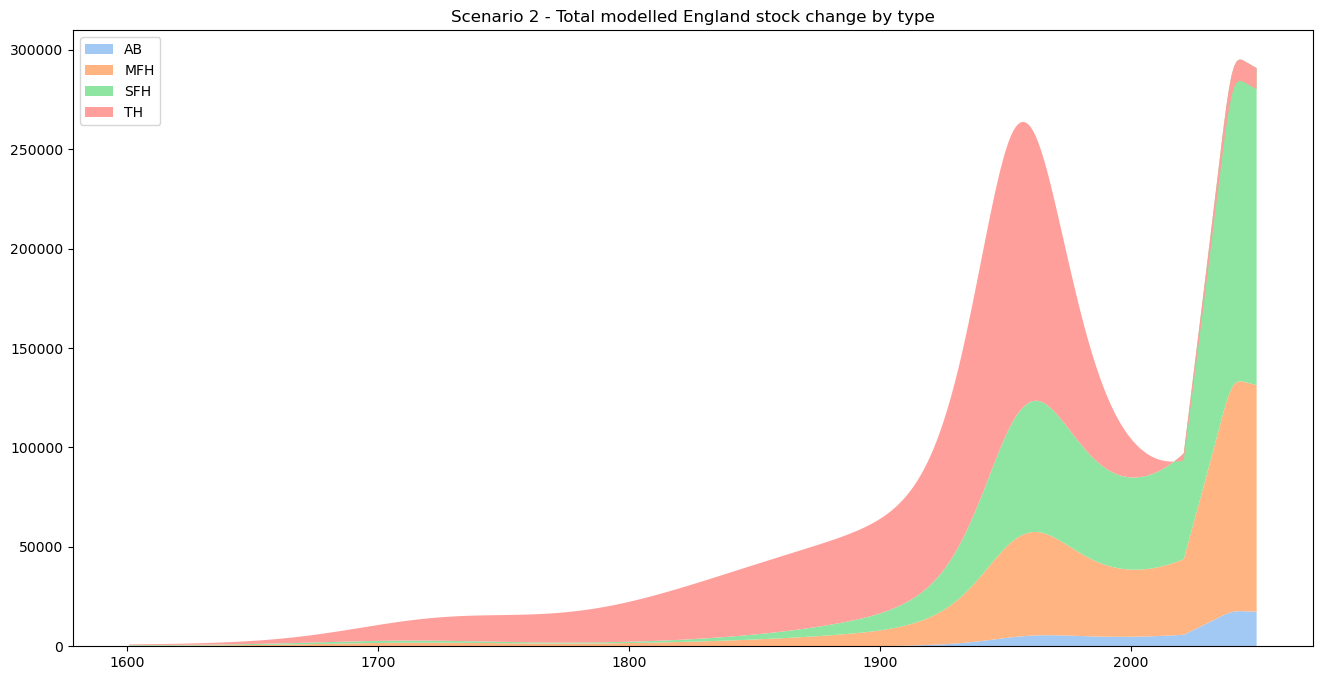

In [193]:
plt.figure(figsize=(16,8))
TYP = ['AB','MFH','SFH','TH']
stocks_by_types = [DSM_AB_s2['Stock Change'].to_list(),DSM_MFH_s2['Stock Change'].to_list(),DSM_SFH_s2['Stock Change'].to_list(),DSM_TH_s2['Stock Change'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM_model_s2.index,stocks_by_types, labels=TYP, colors=colors)
plt.legend(loc='upper left')
plt.title('Scenario 2 - Total modelled England stock change by type')
plt.savefig("Output/Scenario_2-Stock-change-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

In [175]:
for i in range (2021,2051):
    DSM_AB_s2.loc[i,'Stock'] = DSM_AB_s2.loc[i-1,'Stock'] + DSM_AB_s2.loc[i,'Stock Change']
    
for i in range (2021,2051):
    DSM_MFH_s2.loc[i,'Stock'] = DSM_MFH_s2.loc[i-1,'Stock'] + DSM_MFH_s2.loc[i,'Stock Change']

for i in range (2021,2051):
    DSM_SFH_s2.loc[i,'Stock'] = DSM_SFH_s2.loc[i-1,'Stock'] + DSM_SFH_s2.loc[i,'Stock Change']
    
for i in range (2021,2051):
    DSM_TH_s2.loc[i,'Stock'] = DSM_TH_s2.loc[i-1,'Stock'] + DSM_TH_s2.loc[i,'Stock Change']

<Figure size 1600x800 with 0 Axes>

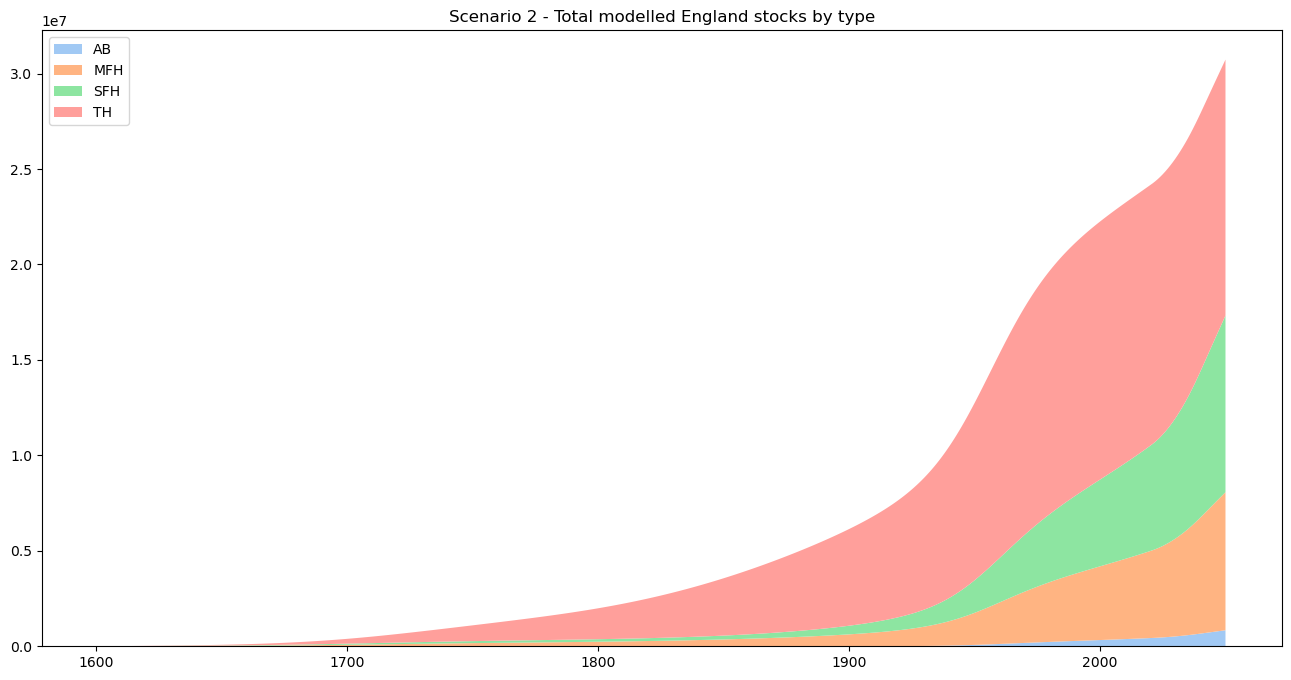

In [194]:
plt.figure(figsize=(16,8))
TYP = ['AB','MFH','SFH','TH']
stocks_by_types = [DSM_AB_s2['Stock'].to_list(),DSM_MFH_s2['Stock'].to_list(),DSM_SFH_s2['Stock'].to_list(),DSM_TH_s2['Stock'].to_list()]
colors = sns.color_palette('pastel')[0:5]

plt.figure(figsize=(16,8))
plt.stackplot(DSM_model_s2.index,stocks_by_types, labels=TYP, colors=colors)
plt.legend(loc='upper left')
plt.title('Scenario 2 - Total modelled England stocks by type')
plt.savefig("Output/Scenario_2-Stocks-by-type-shares-1600-2050.png",dpi=300,bbox_inches='tight')
plt.show()

# Creation of the tables

In [177]:
stock_AB_s2 = pd.read_csv('Model/stock_AB.csv')
stock_AB_s2 = stock_AB_s2.set_index('Time ↓ \\ Cohort →')
stock_AB_s2.columns = stock_AB_s2.columns.astype(int)

stock_MFH_s2 = pd.read_csv('Model/stock_MFH.csv')
stock_MFH_s2 = stock_MFH_s2.set_index('Time ↓ \\ Cohort →')
stock_MFH_s2.columns = stock_MFH_s2.columns.astype(int)

stock_SFH_s2 = pd.read_csv('Model/stock_SFH.csv')
stock_SFH_s2 = stock_SFH_s2.set_index('Time ↓ \\ Cohort →')
stock_SFH_s2.columns = stock_SFH_s2.columns.astype(int)

stock_TH_s2 = pd.read_csv('Model/stock_TH.csv')
stock_TH_s2 = stock_TH_s2.set_index('Time ↓ \\ Cohort →')
stock_TH_s2.columns = stock_TH_s2.columns.astype(int)

inflow_shares = pd.read_csv('Model/Inflow_shares.csv')
inflow_shares = inflow_shares.set_index('Unnamed: 0')


In [111]:
display(inflow_shares)

,Unnamed: 0,AB,MFH,SFH,TH
0,1600,0.000000,0.000000,0.000000,0.000000
1,1601,0.000000,314.763354,284.439869,317.292166
2,1602,0.000000,319.750989,288.346469,329.473430
3,1603,0.000000,324.648657,292.149266,341.848464
4,1604,0.000000,329.457086,295.849208,354.415592
...,...,...,...,...,...
446,2046,10674.089303,74607.109428,102055.791335,20169.298776
447,2047,10832.940856,75587.856720,103452.900458,18931.451816
448,2048,10993.201521,76577.294159,104862.494088,17671.021090
449,2049,11154.876195,77575.464374,106284.628802,16387.902495


In [157]:
times_index = range(1600,2051)
cohort_index = range(1600,2051)

In [47]:
display(stock_AB_s2)

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Time ↓ \ Cohort →,,,,,,,,,,,,,,,,,,,,,
1600,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,0,0,0,0,0,0,0,0,0,...,9717.521267,9897.761928,10080.250389,10264.999652,10452.022625,10674.089303,0.000000,0.000000,0.000000,0.000000
2047,0,0,0,0,0,0,0,0,0,0,...,9686.761541,9866.589253,10048.664169,10232.999374,10419.607862,10608.502531,10832.940856,0.000000,0.000000,0.000000
2048,0,0,0,0,0,0,0,0,0,0,...,9655.945658,9835.357669,10017.016233,10200.934519,10387.125606,10575.602478,10766.378023,10993.201521,0.000000,0.000000


In [178]:
def lifetime(t,c,sigma=125,tau=35):
    lifetime = 1/(sigma*sqrt(2*pi))*exp(-(t-c-tau)**2/(2*sigma**2))
    return(lifetime)

def remain_stock(inflow,t,c,sigma=125,tau=35):
    if t==c:
        remain_stock=inflow
    else:
        total_lifetime_distribution=0
        for i in range(c,t+1):
            total_lifetime_distribution+=lifetime(i,c)
        remain_stock=inflow-inflow*total_lifetime_distribution
    return(remain_stock)

In [125]:
display(DSM_AB_s2.loc[2021,'Inflow'])

3337.4897851639043

In [126]:
display(inflow_shares.loc[2021,'AB'])

7371.357904946781

In [179]:
#for t in range (2021,2051):
for t in range(2021,2051):
    for c in range(1600,t+1):
        stock_AB_s2.loc[t,c]=remain_stock(inflow_shares.loc[c,'AB'],t,c)
    DSM_AB_s2.loc[t,'Outflow'] = stock_AB_s2.loc[t-1,1600:t-1].sum() - stock_AB_s2.loc[t,1600:t-1].sum()
    DSM_AB_s2.loc[t,'Inflow'] = DSM_AB_s2.loc[t,'Stock Change'] + DSM_AB_s2.loc[t,'Outflow']
    stock_AB_s2.loc[t,t] = DSM_AB_s2.loc[t,'Inflow']
    inflow_shares.loc[t,'AB'] = DSM_AB_s2.loc[t,'Inflow']    
stock_AB_s2.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Time ↓ \ Cohort →,,,,,,,,,,,,,,,,,,,,,
1600,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
for t in range (2021,2051):
    for c in range(1600,t+1):
        stock_MFH_s2.loc[t,c]=remain_stock(inflow_shares.loc[c,'MFH'],t,c)
    DSM_MFH_s2.loc[t,'Outflow'] = stock_MFH_s2.loc[t-1,1600:t-1].sum() - stock_MFH_s2.loc[t,1600:t-1].sum()
    DSM_MFH_s2.loc[t,'Inflow'] = DSM_MFH_s2.loc[t,'Stock Change'] + DSM_MFH_s2.loc[t,'Outflow']
    stock_MFH_s2.loc[t,t] = DSM_MFH_s2.loc[t,'Inflow']
    inflow_shares.loc[t,'MFH'] = DSM_MFH_s2.loc[t,'Inflow']     
stock_MFH_s2.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Time ↓ \ Cohort →,,,,,,,,,,,,,,,,,,,,,
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,314.763354,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,312.829295,319.750989,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,311.859121,317.786284,324.648657,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,310.886926,316.800736,322.653858,329.457086,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
print(inflow_shares.loc[2021,'SFH'])
print(DSM_SFH_s2.loc[2021,'Inflow'] )



42438.0211744588
42438.0211744588


In [181]:
for t in range (2021,2051):
    for c in range(1600,t+1):
        stock_SFH_s2.loc[t,c]=remain_stock(inflow_shares.loc[c,'SFH'],t,c)
    DSM_SFH_s2.loc[t,'Outflow'] = stock_SFH_s2.loc[t-1,1600:t-1].sum() - stock_SFH_s2.loc[t,1600:t-1].sum()
    DSM_SFH_s2.loc[t,'Inflow'] = DSM_SFH_s2.loc[t,'Stock Change'] + DSM_SFH_s2.loc[t,'Outflow']
    stock_SFH_s2.loc[t,t] = DSM_SFH_s2.loc[t,'Inflow']
    inflow_shares.loc[t,'SFH'] = DSM_SFH_s2.loc[t,'Inflow']           
stock_SFH_s2.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Time ↓ \ Cohort →,,,,,,,,,,,,,,,,,,,,,
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,284.439869,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,282.692133,288.346469,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,281.815423,286.574729,292.149266,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,280.936887,285.685978,290.354159,295.849208,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
L=[0,1,3,4]
print(L[0:2])

[0, 1]


In [64]:
display(stock_TH_s2.loc[2020,1600:2020])

1600        0.000000
1601      123.507201
1602      128.258192
1603      133.085557
1604      137.988691
            ...     
2016    49262.320887
2017    48506.365759
2018    47750.940201
2019    46993.987097
2020    46375.832486
Name: 2020, Length: 421, dtype: float64

In [62]:
display(stock_TH_s2.loc[2021,1600:2020].sum())

13604824.290599713

In [61]:
display(stock_TH_s2.loc[2021].sum())

13663605.147912623

In [91]:
stock_TH_s2.loc[t-1,1600:t-1].sum()

17195950.921687488

In [92]:
stock_TH_s2.loc[t,1600:t-1].sum()

13132700.35701735

In [182]:
for t in range (2021,2051):
    for c in range(1600,t+1):
        stock_TH_s2.loc[t,c]=remain_stock(inflow_shares.loc[c,'TH'],t,c)
    DSM_TH_s2.loc[t,'Outflow'] = stock_TH_s2.loc[t-1,1600:t-1].sum() - stock_TH_s2.loc[t,1600:t-1].sum()
    DSM_TH_s2.loc[t,'Inflow'] = DSM_TH_s2.loc[t,'Stock Change'] + DSM_TH_s2.loc[t,'Outflow']
    stock_TH_s2.loc[t,t] = DSM_TH_s2.loc[t,'Inflow']
    inflow_shares.loc[t,'TH'] = DSM_TH_s2.loc[t,'Inflow']           
stock_TH_s2.head()

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Time ↓ \ Cohort →,,,,,,,,,,,,,,,,,,,,,
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,317.292166,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,315.342570,329.473430,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,314.364601,327.448986,341.848464,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,313.384595,326.433471,339.747982,354.415592,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
display(stock_TH_s2.head())

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Time ↓ \ Cohort →,,,,,,,,,,,,,,,,,,,,,
1600,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,0,317.292166,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0,315.342570,329.473430,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0,314.364601,327.448986,341.848464,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,313.384595,326.433471,339.747982,354.415592,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


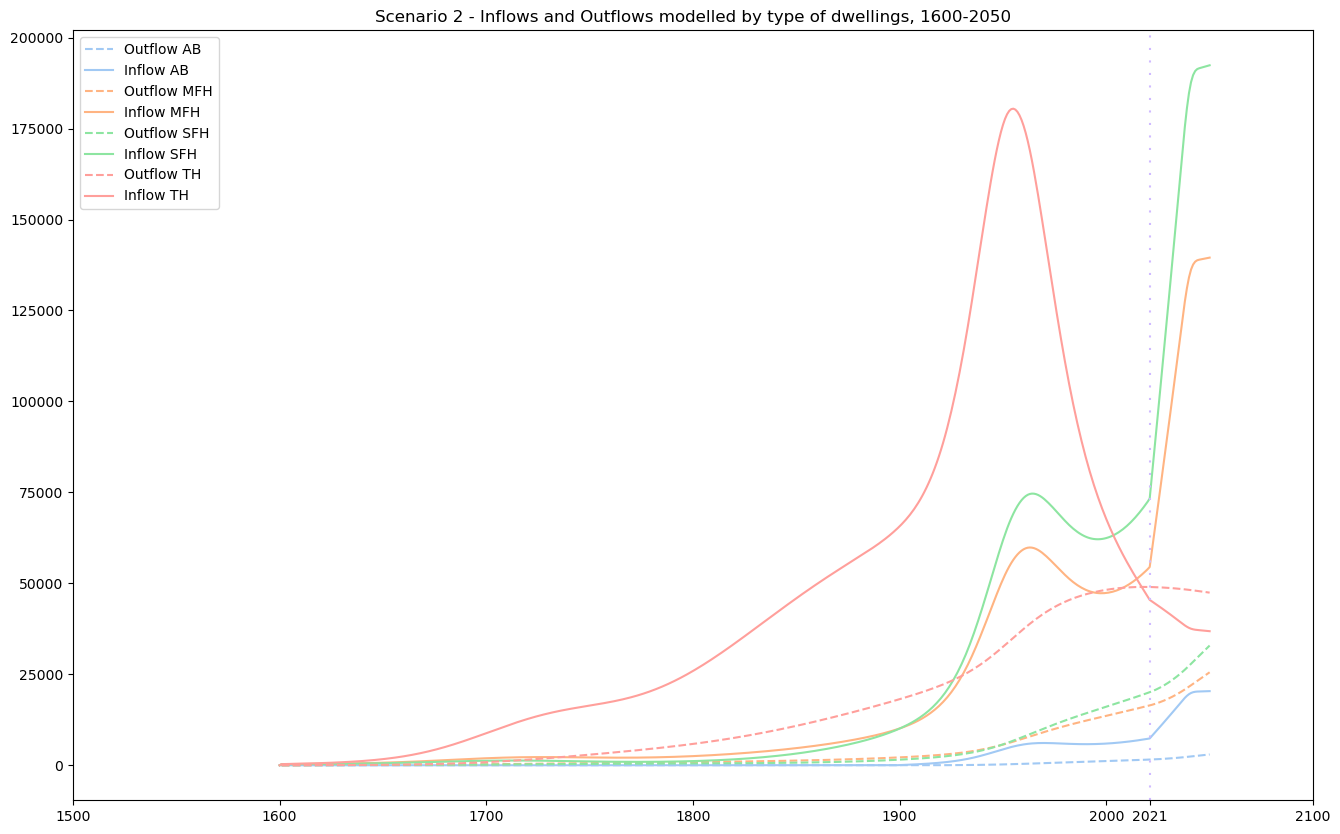

In [192]:
plt.figure(figsize=(16,10))
colors = sns.color_palette('pastel')[0:5]
plt.plot(DSM_AB_s2['Outflow'],color=colors[0],linestyle='dashed', label='Outflow AB')
plt.plot(DSM_AB_s2['Inflow'], color=colors[0], label='Inflow AB')
plt.plot(DSM_MFH_s2['Outflow'],color=colors[1],linestyle='dashed', label='Outflow MFH')
plt.plot(DSM_MFH_s2['Inflow'], color=colors[1], label='Inflow MFH')
plt.plot(DSM_SFH_s2['Outflow'],color=colors[2],linestyle='dashed', label='Outflow SFH')
plt.plot(DSM_SFH_s2['Inflow'], color=colors[2], label='Inflow SFH')
plt.plot(DSM_TH_s2['Outflow'],color=colors[3],linestyle='dashed', label='Outflow TH')
plt.plot(DSM_TH_s2['Inflow'], color=colors[3], label='Inflow TH')
plt.axvline(x=2021, color=colors[4], linestyle=(0,(1,5)))
plt.xticks(list(plt.xticks()[0]) + [2021])
plt.title('Scenario 2 - Inflows and Outflows modelled by type of dwellings, 1600-2050')
plt.legend()
plt.savefig('Output/Scenario_2-Inflows_and_outflows_modelled.png',dpi=300,bbox_inches='tight')
plt.show()